In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data_science_job.csv')

In [4]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [5]:
# here i can only apply cca when the null value is less than 5% and check the effect of intial and after the cca

In [6]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [7]:
df.shape

(19158, 13)

In [8]:
cols = [var for var in df.columns if df[var].isnull().mean()<0.05 and df[var].isnull().mean()>0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [9]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
12817,0.624,no_enrollment,High School,2.0,104.0
5519,0.767,Full time course,Graduate,3.0,168.0
9099,0.624,Full time course,Graduate,18.0,72.0
17536,0.550,no_enrollment,Masters,5.0,62.0
1219,0.920,Full time course,Graduate,10.0,278.0


In [10]:
df['education_level'].value_counts()

education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

In [11]:
df['enrolled_university'].value_counts()

enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: count, dtype: int64

In [12]:
len(df[cols].dropna())/len(df)

0.8968577095730244

In [13]:
df_new = df[cols].dropna()
df.shape,df_new.shape

((19158, 13), (17182, 5))

C:\Users\Hp\AppData\Local\Temp\ipykernel_13408\3051518529.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_new.hist(bins=50, density=True, color='red', alpha=0.5, ax=ax)
C:\Users\Hp\AppData\Local\Temp\ipykernel_13408\3051518529.py:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(bins=50, density=True, color='green', alpha=0.5, ax=ax)


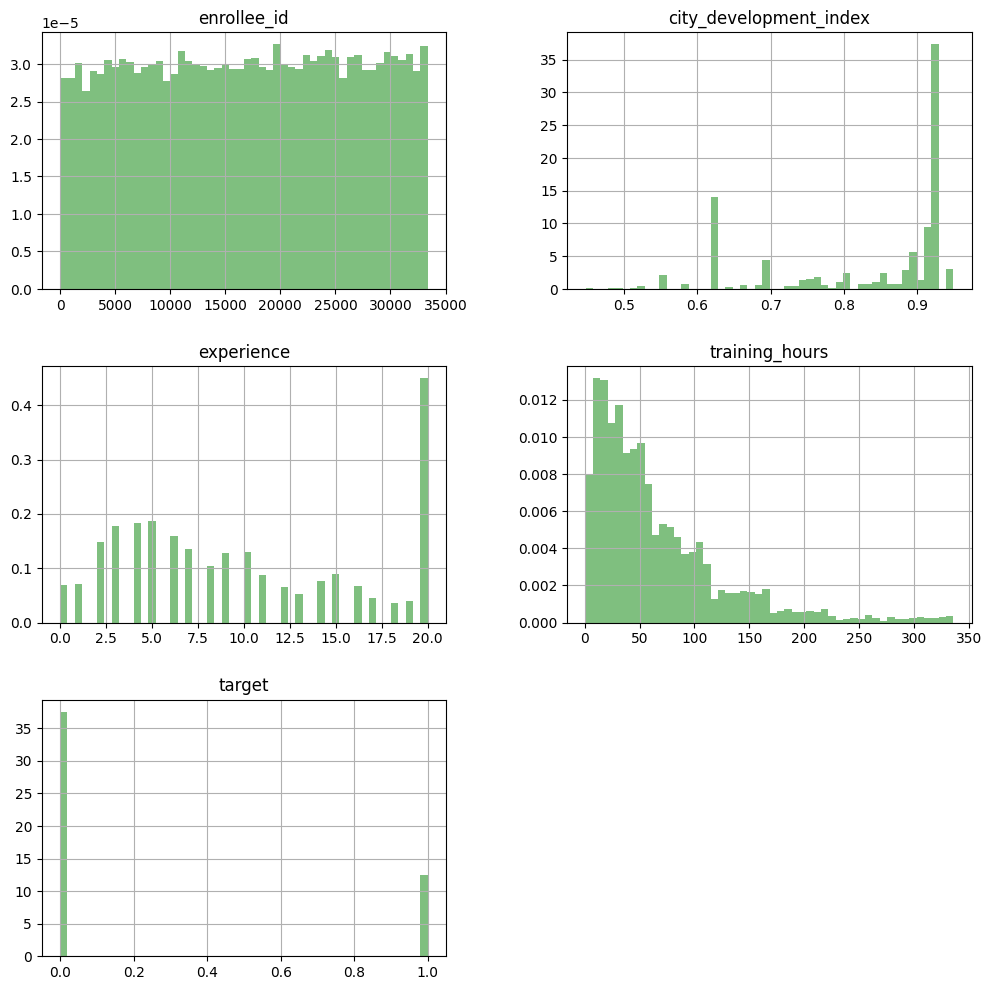

In [20]:
fig, ax = plt.subplots(figsize=(12, 12))

# Plot histogram for df_new
df_new.hist(bins=50, density=True, color='red', alpha=0.5, ax=ax)

# Plot histogram for df
df.hist(bins=50, density=True, color='green', alpha=0.5, ax=ax)

# Show the plot
plt.show()

# Here through with the help of graph i am analyzing wheter the distribution of the data both before and after CCA how does it changes and if the graph are almost overlapping each other means that the data that has been drop were not together that has been drop randomly and it is acceptable to drop them 

<Axes: >

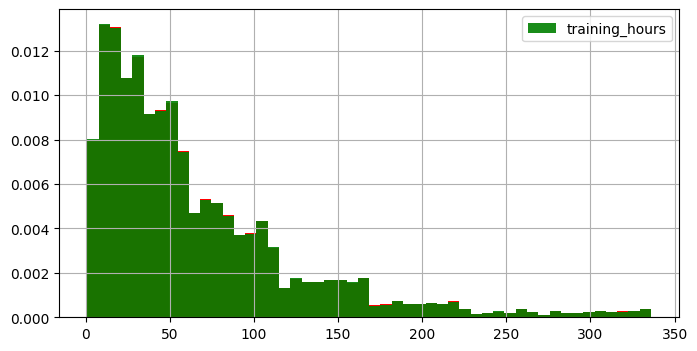

In [43]:
plt.figure(figsize = (8,4))
df['training_hours'].hist(bins = 50,density = True, color = 'red')
df_new['training_hours'].hist(bins = 50,density = True, color = 'green', alpha = 0.9, legend = True)

<Axes: ylabel='Density'>

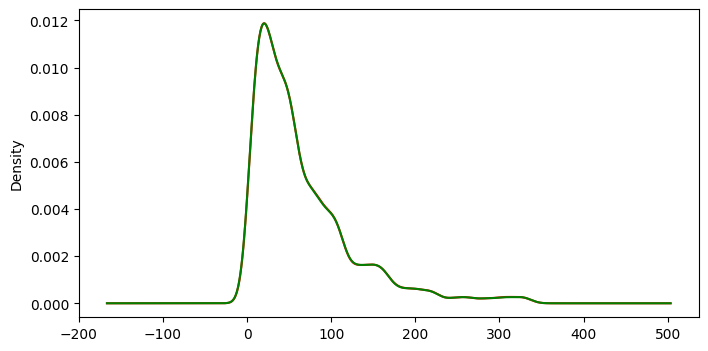

In [46]:
plt.figure(figsize = (8,4))
df['training_hours'].plot.density(color = 'red')
df_new['training_hours'].plot.density(color = 'green')

<Axes: ylabel='Frequency'>

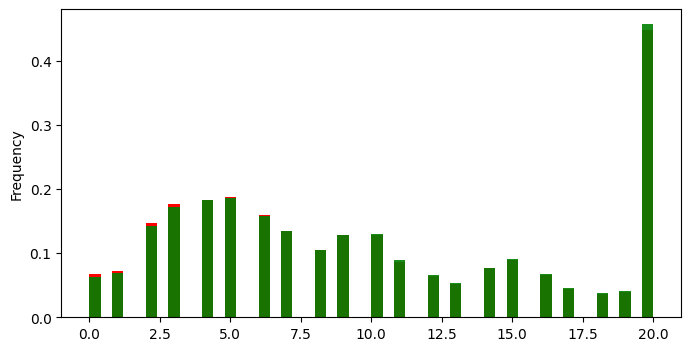

In [47]:
plt.figure(figsize = (8,4))
df['experience'].plot.hist(bins = 50,color = 'red',density = True)
df_new['experience'].plot.hist(bins = 50,color = 'green',density = True,alpha = 0.9)

<Axes: ylabel='Density'>

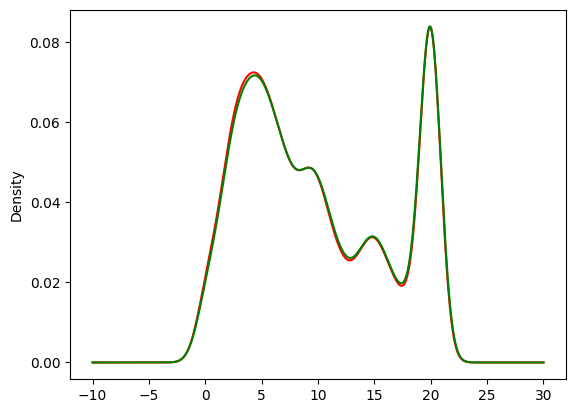

In [50]:
df['experience'].plot.density(color = 'red')
df_new['experience'].plot.density(color = 'green')


<Axes: ylabel='Frequency'>

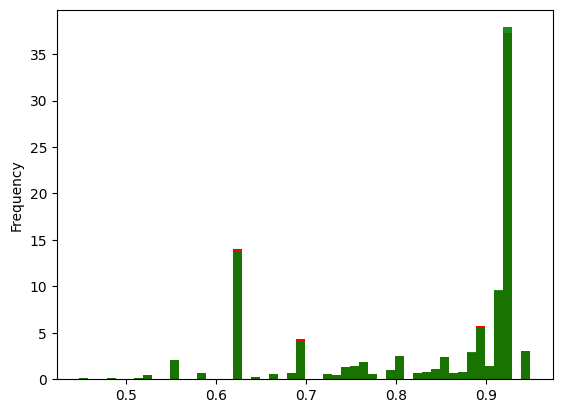

In [51]:
df['city_development_index'].plot.hist(bins = 50,color = 'red',density = True)
df_new['city_development_index'].plot.hist(bins = 50,color = 'green',density = True,alpha = 0.9)

<Axes: ylabel='Density'>

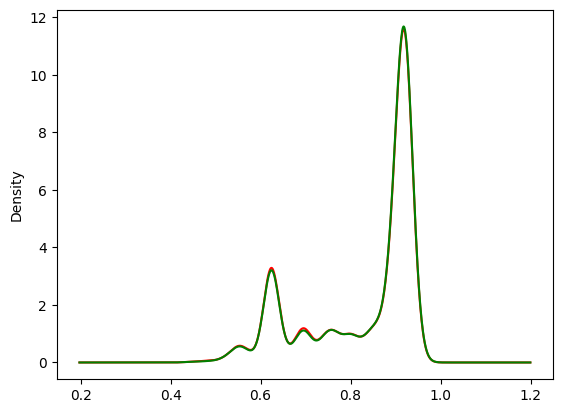

In [52]:
df['city_development_index'].plot.density(color = 'red')
df_new['city_development_index'].plot.density(color = 'green')

# Here i am checking the ratio of the data intially without CCA and after CCA and if the ratio looks similar then it is acceptable case of CCA 

In [61]:
temp = pd.concat([
    
    df['enrolled_university'].value_counts()/len(df),
    df_new['enrolled_university'].value_counts()/len(df_new)
], axis = 1)

In [62]:
temp.columns = ['Before CCA', 'After CCA']

In [63]:
temp

,Before CCA,After CCA
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [64]:
temp = pd.concat([
    
    df['education_level'].value_counts()/len(df),
    df_new['education_level'].value_counts()/len(df_new)
], axis = 1)
temp.columns = ['Before CCA', 'After CCA']
temp

,Before CCA,After CCA
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
